In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)

# データの読み込み


In [3]:
reviews = pd.read_csv("/content/drive/My Drive/input_data/reviews.csv")
listings = pd.read_csv("/content/drive/My Drive/input_data/listings.csv")

In [4]:
import io
def info_to_dataframe(df):
    buffer = io.StringIO()
    df.info(buf = buffer)
    df_info = buffer.getvalue().split("\n")

    index = []
    columns = []
    counts = []
    dtype = []
    for data_i in df_info[5:-3]:
        data_i_split = data_i.split('  ')
        #print(data_i_split)
        t = True
        i = 0
        count = 0
        while t:
            if data_i_split[i] != '':
                if count == 0:
                    index.append(data_i_split[i])
                    count += 1
                    #print(1)
                elif count == 1:
                    columns.append(data_i_split[i])
                    count += 1
                    #print(2)
                elif count == 2:
                    counts.append(data_i_split[i])
                    count += 1
                    #print(3)
                elif count == 3:
                    dtype.append(data_i_split[i])                
                    count += 1
                    #print(4)
                    t = False
            i += 1
    
    return pd.DataFrame({"index":index,
                            "columns":columns,
                            "count":counts,
                            "dtype":dtype})

In [5]:
info_to_dataframe(reviews)

,index,columns,count,dtype
0,0,listing_id,403641 non-null,int64
1,1,id,403641 non-null,int64
2,2,date,403641 non-null,object
3,3,reviewer_id,403641 non-null,int64
4,4,reviewer_name,403639 non-null,object
5,5,comments,403419 non-null,object


In [6]:
info_to_dataframe(listings)

,index,columns,count,dtype
0,0,id,1000 non-null,int64
1,1,listing_url,1000 non-null,object
2,2,scrape_id,1000 non-null,int64
3,3,last_scraped,1000 non-null,object
4,4,name,1000 non-null,object
5,5,description,999 non-null,object
6,6,neighborhood_overview,899 non-null,object
7,7,picture_url,1000 non-null,object
8,8,host_id,1000 non-null,int64
9,9,host_url,1000 non-null,object


In [7]:
reviews.shape

(403641, 6)

In [8]:
review_big5_data = pd.read_csv('/content/drive/My Drive/result_data/result.csv')

In [9]:
review_big5_data.head()

,times,word_count,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
0,1,13748,0.941886,0.705202,0.979137,0.905283,0.139847
1,2,19673,0.929087,0.573840,0.940695,0.834123,0.069888
2,3,36984,0.918870,0.868343,0.986226,0.995536,0.061596
3,4,22674,0.881410,0.486460,0.864160,0.552520,0.241194
4,5,40748,0.921969,0.814995,0.974597,0.936079,0.069022


In [10]:
review_big5_data.describe()

,times,word_count,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,17889.328000,0.902982,0.722115,0.945206,0.835926,0.088234
std,288.819436,7126.754973,0.046433,0.108649,0.040677,0.117657,0.072180
min,1.000000,4117.000000,0.694279,0.334995,0.709882,0.321755,0.002510
25%,250.750000,12889.500000,0.877942,0.654603,0.927787,0.766546,0.038908
50%,500.500000,16863.000000,0.910606,0.731164,0.955562,0.862474,0.067615
75%,750.250000,22188.000000,0.936009,0.799976,0.973292,0.925575,0.116897
max,1000.000000,45892.000000,0.990830,0.948811,0.997511,0.998258,0.420972


In [11]:
review_big5_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   times                   1000 non-null   int64  
 1   word_count              1000 non-null   int64  
 2   big5_openness           1000 non-null   float64
 3   big5_conscientiousness  1000 non-null   float64
 4   big5_extraversion       1000 non-null   float64
 5   big5_agreeableness      1000 non-null   float64
 6   big5_neuroticism        1000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 54.8 KB


In [12]:
id_list = reviews["listing_id"].unique()
id_list.sort()
id_list

array([    3831,     4505,     5178,     6422,     7126,     8739,
          12522,    16580,    18904,    19091,    20585,    23630,
          25463,    25613,    26362,    26785,    26969,    31994,
          39704,    39742,    50724,    54829,    58059,    62274,
          62949,    63360,    67089,    68045,    69838,    70753,
          72444,    74498,    76561,    76761,    79536,    79609,
          79832,    80869,    87595,    89173,    94477,   106363,
         107970,   109883,   114401,   126443,   138211,   151199,
         158955,   162525,   164207,   165967,   174015,   183207,
         184238,   189821,   191632,   205008,   205043,   207218,
         207980,   208831,   209514,   210968,   212783,   213532,
         220418,   223837,   227594,   229240,   230529,   232612,
         240258,   262648,   268423,   277339,   281139,   283017,
         312200,   329997,   345394,   350347,   351881,   361703,
         373034,   400940,   413749,   416853,   421290,   430

In [13]:
# 施設ごとのbig5のデータに、idを付与。
big5_openness = review_big5_data["big5_openness"].values
big5_conscientiousness = review_big5_data["big5_conscientiousness"].values
big5_extraversion = review_big5_data["big5_extraversion"].values
big5_agreeableness = review_big5_data["big5_agreeableness"].values
big5_neuroticism = review_big5_data["big5_neuroticism"].values


review_big5_data = pd.DataFrame({
                                "id":id_list,
                                 "big5_openness":big5_openness,
                                 "big5_conscientiousness":big5_conscientiousness,
                                "big5_extraversion":big5_extraversion,
                                 "big5_agreeableness":big5_agreeableness,
                                 "big5_neuroticism":big5_neuroticism,
                                 })
review_big5_data.head()

,id,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
0,3831,0.941886,0.705202,0.979137,0.905283,0.139847
1,4505,0.929087,0.573840,0.940695,0.834123,0.069888
2,5178,0.918870,0.868343,0.986226,0.995536,0.061596
3,6422,0.881410,0.486460,0.864160,0.552520,0.241194
4,7126,0.921969,0.814995,0.974597,0.936079,0.069022


<h1>Big5スコアの基本統計量</h1>
<ul>
<li>big5_openness：開放性</li>
<li>big5_conscientiousness：誠実性</li>
<li>big5_extraversion：外交性</li>
<li>big5_agreeableness：協調性</li>
<li>big5_neurotic：情動性</li>
</ul>

In [14]:
review_big5_data.describe()

,id,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.825587e+06,0.902982,0.722115,0.945206,0.835926,0.088234
std,7.345264e+06,0.046433,0.108649,0.040677,0.117657,0.072180
min,3.831000e+03,0.694279,0.334995,0.709882,0.321755,0.002510
25%,1.612040e+06,0.877942,0.654603,0.927787,0.766546,0.038908
50%,5.662122e+06,0.910606,0.731164,0.955562,0.862474,0.067615
75%,1.280141e+07,0.936009,0.799976,0.973292,0.925575,0.116897
max,3.660330e+07,0.990830,0.948811,0.997511,0.998258,0.420972


In [15]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            1000 non-null   int64  
 1   listing_url                                   1000 non-null   object 
 2   scrape_id                                     1000 non-null   int64  
 3   last_scraped                                  1000 non-null   object 
 4   name                                          1000 non-null   object 
 5   description                                   999 non-null    object 
 6   neighborhood_overview                         899 non-null    object 
 7   picture_url                                   1000 non-null   object 
 8   host_id                                       1000 non-null   int64  
 9   host_url                                      1000 non-null   ob

In [16]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10069247,https://www.airbnb.com/rooms/10069247,20201024055553,2020-10-24,Shared Artist Loft Own Private Room,Note: Check-in is at noon.<br />Note: we have ...,Your right in the middle of everything. Fine r...,https://a0.muscache.com/pictures/d6d2765a-782d...,51668477,https://www.airbnb.com/users/show/51668477,Michael,2015-12-18,"Chicago, Illinois, United States",I am a 60 year old artist who loves to travel....,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/c6b02...,https://a0.muscache.com/im/pictures/user/c6b02...,River North,8.0,8.0,"['email', 'phone', 'reviews']",t,f,"Chicago, Illinois, United States",Near North Side,NaN,41.88924,-87.63032,Private room in loft,Private room,3,NaN,1 shared bath,1.0,2.0,"[""Patio or balcony"", ""Dryer"", ""Iron"", ""Buildin...",$96.00,1,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,26,56,86,338,2020-10-24,650,117,12,2015-12-30,2020-10-19,98.0,10.0,10.0,10.0,10.0,10.0,10.0,R18000031600,t,8,0,8,0,11.07
1,464581,https://www.airbnb.com/rooms/464581,20201024055553,2020-10-24,"Large, Private Logan Square Studio","Your hideout in the City! Cozy, large garden ...","- Logan Square is an electric, eccentric mix o...",https://a0.muscache.com/pictures/8321116/4c80f...,2308792,https://www.airbnb.com/users/show/2308792,Jonathan,2012-05-06,"Chicago, Illinois, United States",Hello everyone! I'm Jonathan and I'm an avid ...,within an hour,100%,95%,t,https://a0.muscache.com/im/pictures/user/5014b...,https://a0.muscache.com/im/pictures/user/5014b...,Logan Square,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Chicago, Illinois, United States",Logan Square,NaN,41.92451,-87.69385,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Iron"", ""Hair dryer"", ""Private entrance"", ""Fi...",$67.00,2,360,2.0,30.0,1125.0,1125.0,9.1,1125.0,NaN,t,9,32,62,100,2020-10-24,634,45,4,2012-08-23,2020-10-13,96.0,10.0,10.0,10.0,10.0,10.0,10.0,R17000017731,f,1,1,0,0,6.37
2,726376,https://www.airbnb.com/rooms/726376,20201024055553,2020-10-24,"Spacious Studio, Amazing Location!",Fantastic classic Chicago space in an unbeatab...,East Lakeview is one of the most special neigh...,https://a0.muscache.com/pictures/d1fe48b4-fd8c...,2658212,https://www.airbnb.com/users/show/2658212,James,2012-06-17,"Chicago, Illinois, United States",I'm an arts enthusiast and entrepreneur in the...,within an hour,80%,85%,f,https://a0.muscache.com/im/pictures/user/5ec63...,https://a0.muscache.com/im/pictures/user/5ec63...,Lakeview,5.0,5.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Chicago, Illinois, United States",Lake View,NaN,41.93932,-87.65218,Entire apartment,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Dryer""

<h1>host_locationのデータ形成。</h1>

In [17]:
id_loc = pd.read_csv("/content/drive/My Drive/input_data/id_loc.csv")

In [18]:
id_loc.head()

,id,loc
0,10069247,Chicago
1,464581,Chicago
2,726376,Chicago
3,2570620,Chicago
4,1171860,Chicago


In [19]:
listings = pd.merge(listings,id_loc)

In [20]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,loc
0,10069247,https://www.airbnb.com/rooms/10069247,20201024055553,2020-10-24,Shared Artist Loft Own Private Room,Note: Check-in is at noon.<br />Note: we have ...,Your right in the middle of everything. Fine r...,https://a0.muscache.com/pictures/d6d2765a-782d...,51668477,https://www.airbnb.com/users/show/51668477,Michael,2015-12-18,"Chicago, Illinois, United States",I am a 60 year old artist who loves to travel....,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/c6b02...,https://a0.muscache.com/im/pictures/user/c6b02...,River North,8.0,8.0,"['email', 'phone', 'reviews']",t,f,"Chicago, Illinois, United States",Near North Side,NaN,41.88924,-87.63032,Private room in loft,Private room,3,NaN,1 shared bath,1.0,2.0,"[""Patio or balcony"", ""Dryer"", ""Iron"", ""Buildin...",$96.00,1,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0,NaN,t,26,56,86,338,2020-10-24,650,117,12,2015-12-30,2020-10-19,98.0,10.0,10.0,10.0,10.0,10.0,10.0,R18000031600,t,8,0,8,0,11.07,Chicago
1,464581,https://www.airbnb.com/rooms/464581,20201024055553,2020-10-24,"Large, Private Logan Square Studio","Your hideout in the City! Cozy, large garden ...","- Logan Square is an electric, eccentric mix o...",https://a0.muscache.com/pictures/8321116/4c80f...,2308792,https://www.airbnb.com/users/show/2308792,Jonathan,2012-05-06,"Chicago, Illinois, United States",Hello everyone! I'm Jonathan and I'm an avid ...,within an hour,100%,95%,t,https://a0.muscache.com/im/pictures/user/5014b...,https://a0.muscache.com/im/pictures/user/5014b...,Logan Square,3.0,3.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Chicago, Illinois, United States",Logan Square,NaN,41.92451,-87.69385,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,2.0,"[""Iron"", ""Hair dryer"", ""Private entrance"", ""Fi...",$67.00,2,360,2.0,30.0,1125.0,1125.0,9.1,1125.0,NaN,t,9,32,62,100,2020-10-24,634,45,4,2012-08-23,2020-10-13,96.0,10.0,10.0,10.0,10.0,10.0,10.0,R17000017731,f,1,1,0,0,6.37,Chicago
2,726376,https://www.airbnb.com/rooms/726376,20201024055553,2020-10-24,"Spacious Studio, Amazing Location!",Fantastic classic Chicago space in an unbeatab...,East Lakeview is one of the most special neigh...,https://a0.muscache.com/pictures/d1fe48b4-fd8c...,2658212,https://www.airbnb.com/users/show/2658212,James,2012-06-17,"Chicago, Illinois, United States",I'm an arts enthusiast and entrepreneur in the...,within an hour,80%,85%,f,https://a0.muscache.com/im/pictures/user/5ec63...,https://a0.muscache.com/im/pictures/user/5ec63...,Lakeview,5.0,5.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Chicago, Illinois, United States",Lake View,NaN,41.93932,-87.65218,Entire apartment,Entire home/apt,2,NaN,1 bath

In [21]:
host_scored = listings[["id","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"]]

<h1>評価値のばらつき</h1>

In [22]:
host_scored.describe()

,id,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,1.000000e+03,1000.000000,971.000000,971.000000,971.000000,971.000000,971.000000,971.000000
mean,7.825587e+06,96.117000,9.838311,9.678682,9.932029,9.920700,9.876416,9.684861
std,7.345264e+06,3.044434,0.410701,0.527344,0.263822,0.292331,0.344575,0.513295
min,3.831000e+03,73.000000,6.000000,7.000000,8.000000,7.000000,8.000000,6.000000
25%,1.612040e+06,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,5.662122e+06,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,1.280141e+07,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,3.660330e+07,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [23]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

# データセットの作成

In [24]:
select_cols = ['id', 'loc', 'accommodates', "bathrooms_text", 'bedrooms', 'beds', 'price', 'property_type',
                'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

#print(listing_drop_col.columns)
listing_drop_col = listings[select_cols]
listing_drop_col.head()

,id,loc,accommodates,bathrooms_text,bedrooms,beds,price,property_type,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,10069247,Chicago,3,1 shared bath,1.0,2.0,$96.00,Private room in loft,10.0,10.0,10.0,10.0,10.0,10.0
1,464581,Chicago,4,1 bath,1.0,2.0,$67.00,Entire apartment,10.0,10.0,10.0,10.0,10.0,10.0
2,726376,Chicago,2,1 bath,1.0,1.0,$99.00,Entire apartment,10.0,10.0,10.0,10.0,10.0,10.0
3,2570620,Chicago,2,1 bath,NaN,2.0,$45.00,Entire apartment,10.0,10.0,10.0,10.0,9.0,10.0
4,1171860,Chicago,2,1 bath,1.0,1.0,$99.00,Entire apartment,10.0,10.0,10.0,10.0,10.0,10.0


In [25]:
listing_drop_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1000 non-null   int64  
 1   loc                          1000 non-null   object 
 2   accommodates                 1000 non-null   int64  
 3   bathrooms_text               998 non-null    object 
 4   bedrooms                     863 non-null    float64
 5   beds                         1000 non-null   float64
 6   price                        1000 non-null   object 
 7   property_type                1000 non-null   object 
 8   review_scores_accuracy       971 non-null    float64
 9   review_scores_cleanliness    971 non-null    float64
 10  review_scores_checkin        971 non-null    float64
 11  review_scores_communication  971 non-null    float64
 12  review_scores_location       971 non-null    float64
 13  review_scores_value

In [26]:
listing_drop_col.property_type.unique()

array(['Private room in loft', 'Entire apartment', 'Entire loft',
       'Private room in condominium', 'Private room in apartment',
       'Entire guesthouse', 'Room in boutique hotel',
       'Private room in house', 'Entire condominium', 'Room in hostel',
       'Entire guest suite', 'Private room in bungalow',
       'Private room in villa', 'Private room in guest suite',
       'Entire cottage', 'Entire townhouse', 'Entire house', 'Island',
       'Treehouse', 'Tiny house', 'Room in aparthotel', 'Room in hotel',
       'Entire cabin', 'Private room in bed and breakfast', 'Hut',
       'Private room in guesthouse', 'Entire bungalow', 'Yurt',
       'Private room in cottage', 'Room in serviced apartment',
       'Entire serviced apartment', 'Private room in hostel',
       'Private room in townhouse', 'Private room in earth house',
       'Entire villa', 'Shared room in hostel', 'Entire place',
       'Shared room in house', 'Private room in treehouse', 'Boat'],
      dtype=object)

In [27]:
listing_drop_col["property_type"].loc[listing_drop_col["property_type"].str.contains('Entire')] = "Entire"
listing_drop_col["property_type"].loc[listing_drop_col["property_type"].str.contains('Private room')] = "Private room"
listing_drop_col["property_type"].loc[listing_drop_col["property_type"].str.contains('Room in')] = "Room in"
listing_drop_col["property_type"].loc[listing_drop_col["property_type"].str.contains('Shared room')] = 'Shared room'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/li

In [28]:
listing_drop_col.property_type.unique()

array(['Private room', 'Entire', 'Room in', 'Island', 'Treehouse',
       'Tiny house', 'Hut', 'Yurt', 'Shared room', 'Boat'], dtype=object)

In [29]:
# priceの数値化
for i in range(len(listing_drop_col)):
    listing_drop_col.iloc[i,6] = listing_drop_col.iloc[i,6][1:]
for i in range(len(listing_drop_col)):
    listing_drop_col.iloc[i,6] = listing_drop_col.iloc[i,6].replace(',','')
listing_drop_col.price =  listing_drop_col.price.astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
info_to_dataframe(listing_drop_col)

,index,columns,count,dtype
0,0,id,1000 non-null,int64
1,1,loc,1000 non-null,object
2,2,accommodates,1000 non-null,int64
3,3,bathrooms_text,998 non-null,object
4,4,bedrooms,863 non-null,float64
5,5,beds,1000 non-null,float64
6,6,price,1000 non-null,float64
7,7,property_type,1000 non-null,object
8,8,review_scores_accuracy,971 non-null,float64
9,9,review_scores_cleanliness,971 non-null,float64


In [31]:
listing_drop_col["bathrooms_text"] = listing_drop_col["bathrooms_text"].fillna(listing_drop_col["bathrooms_text"].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
# bathデータの整形
bath_index = listing_drop_col["bathrooms_text"].loc[listing_drop_col["bathrooms_text"] != 'Half-bath'].index
for i in bath_index:
    listing_drop_col['bathrooms_text'][i] = listing_drop_col['bathrooms_text'][i].split(" ")[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
bath_index = listing_drop_col["bathrooms_text"].loc[listing_drop_col["bathrooms_text"] == 'half-bath'].index
for i in bath_index:
    listing_drop_col['bathrooms_text'][i] = "Half-bath"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
listing_drop_col['bathrooms_text'].unique()
# A half bathroom is a bathroom that has a sink and a toilet, but no shower or bath.

array(['shared', 'bath', 'baths', 'private', 'Half-bath'], dtype=object)

In [35]:
# ダミー変数化
listing_dummies = pd.get_dummies(listing_drop_col)
print(listing_drop_col.shape,listing_dummies.shape)

(1000, 14) (1000, 36)


In [36]:
data = pd.merge(review_big5_data,listing_dummies)
data = data.drop(['id'],axis=1)
print(data.shape)
data.head()

(1000, 40)


,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism,accommodates,bedrooms,beds,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,loc_Chicago,loc_Hawaii,loc_Las Vegas,loc_Los an Angeles,loc_Miami,loc_Nashvile,loc_New Orleans,loc_New York,loc_San Diego,loc_San Francisco,bathrooms_text_Half-bath,bathrooms_text_bath,bathrooms_text_baths,bathrooms_text_private,bathrooms_text_shared,property_type_Boat,property_type_Entire,property_type_Hut,property_type_Island,property_type_Private room,property_type_Room in,property_type_Shared room,property_type_Tiny house,property_type_Treehouse,property_type_Yurt
0,0.941886,0.705202,0.979137,0.905283,0.139847,3,1.0,3.0,76.0,8.0,9.0,9.0,9.0,9.0,9.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.929087,0.573840,0.940695,0.834123,0.069888,7,3.0,5.0,105.0,10.0,9.0,10.0,10.0,10.0,9.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0.918870,0.868343,0.986226,0.995536,0.061596,2,1.0,1.0,73.0,9.0,7.0,9.0,9.0,10.0,9.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.881410,0.486460,0.864160,0.552520,0.241194,2,2.0,3.0,40.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,0.921969,0.814995,0.974597,0.936079,0.069022,2,3.0,4.0,60.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [37]:
data.columns

Index(['big5_openness', 'big5_conscientiousness', 'big5_extraversion',
       'big5_agreeableness', 'big5_neuroticism', 'accommodates', 'bedrooms',
       'beds', 'price', 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'loc_Chicago',
       'loc_Hawaii', 'loc_Las Vegas', 'loc_Los an Angeles', 'loc_Miami',
       'loc_Nashvile', 'loc_New Orleans', 'loc_New York', 'loc_San Diego',
       'loc_San Francisco', 'bathrooms_text_Half-bath', 'bathrooms_text_bath',
       'bathrooms_text_baths', 'bathrooms_text_private',
       'bathrooms_text_shared', 'property_type_Boat', 'property_type_Entire',
       'property_type_Hut', 'property_type_Island',
       'property_type_Private room', 'property_type_Room in',
       'property_type_Shared room', 'property_type_Tiny house',
       'property_type_Treehouse', 'property_type_Yurt'],
      dtype='object')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   big5_openness                1000 non-null   float64
 1   big5_conscientiousness       1000 non-null   float64
 2   big5_extraversion            1000 non-null   float64
 3   big5_agreeableness           1000 non-null   float64
 4   big5_neuroticism             1000 non-null   float64
 5   accommodates                 1000 non-null   int64  
 6   bedrooms                     863 non-null    float64
 7   beds                         1000 non-null   float64
 8   price                        1000 non-null   float64
 9   review_scores_accuracy       971 non-null    float64
 10  review_scores_cleanliness    971 non-null    float64
 11  review_scores_checkin        971 non-null    float64
 12  review_scores_communication  971 non-null    float64
 13  review_scores_locat

In [39]:
data = data.fillna(data.mean())

In [40]:
data = data.apply(lambda x : ((x - x.mean())*1/x.std()+0),axis=0)
data.head()

,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism,accommodates,bedrooms,beds,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,loc_Chicago,loc_Hawaii,loc_Las Vegas,loc_Los an Angeles,loc_Miami,loc_Nashvile,loc_New Orleans,loc_New York,loc_San Diego,loc_San Francisco,bathrooms_text_Half-bath,bathrooms_text_bath,bathrooms_text_baths,bathrooms_text_private,bathrooms_text_shared,property_type_Boat,property_type_Entire,property_type_Hut,property_type_Island,property_type_Private room,property_type_Room in,property_type_Shared room,property_type_Tiny house,property_type_Treehouse,property_type_Yurt
0,0.837840,-0.155672,0.834155,0.589481,0.715059,-0.041021,-0.481601,1.132947,-0.162593,-4.542453,-1.306078,-3.585217,-3.196242,-2.581211,-1.354043,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,2.998500,-0.333167,-0.333167,-0.070853,0.845311,-0.314328,-0.374314,-0.498188,-0.031623,0.795835,-0.031623,-0.031623,-0.720581,-0.16964,-0.070853,-0.077654,-0.054827,-0.031623
1,0.562193,-1.364726,-0.110912,-0.015324,-0.254172,2.206724,3.439355,2.805194,-0.001788,0.399532,-1.306078,0.261463,0.275292,0.363978,-1.354043,2.998500,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.070853,0.845311,-0.314328,-0.374314,-0.498188,-0.031623,0.795835,-0.031623,-0.031623,-0.720581,-0.16964,-0.070853,-0.077654,-0.054827,-0.031623
2,0.342170,1.345882,1.008423,1.356565,-0.369049,-0.602958,-0.481601,-0.539300,-0.179228,-2.071460,-5.154947,-3.585217,-3.196242,0.363978,-1.354043,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,2.998500,-0.333167,-0.333167,-0.070853,0.845311,-0.314328,-0.374314,-0.498188,-0.031623,-1.255286,-0.031623,-0.031623,1.386381,-0.16964,-0.070853,-0.077654,-0.054827,-0.031623
3,-0.464583,-2.168962,-1.992433,-2.408746,2.119152,-0.602958,1.478877,1.132947,-0.362212,0.399532,0.618356,0.261463,0.275292,0.363978,0.623063,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,2.998500,-0.333167,-0.333167,-0.333167,-0.333167,-0.070853,-1.181814,-0.314328,2.668886,-0.498188,-0.031623,-1.255286,-0.031623,-0.031623,1.386381,-0.16964,-0.070853,-0.077654,-0.054827,-0.031623
4,0.408907,0.854860,0.722536,0.851225,-0.266169,-0.602958,3.439355,1.969071,-0.251312,0.399532,-1.306078,0.261463,0.275292,0.363978,0.623063,2.998500,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.333167,-0.070853,0.845311,-0.314328,-0.374314,-0.498188,-0.031623,0.795835,-0.031623,-0.031623,-0.720581,-0.16964,-0.070853,-0.077654,-0.054827,-0.031623


# 相関係数行列の作成

In [41]:
# 相関行列の算出
corr_mat = data.corr(method='pearson')
# method='spearman'でスピアマン、'kendall'でケンドール、'pearson'でピアソンも指定可能
corr_mat[corr_mat.isnull()] = 0

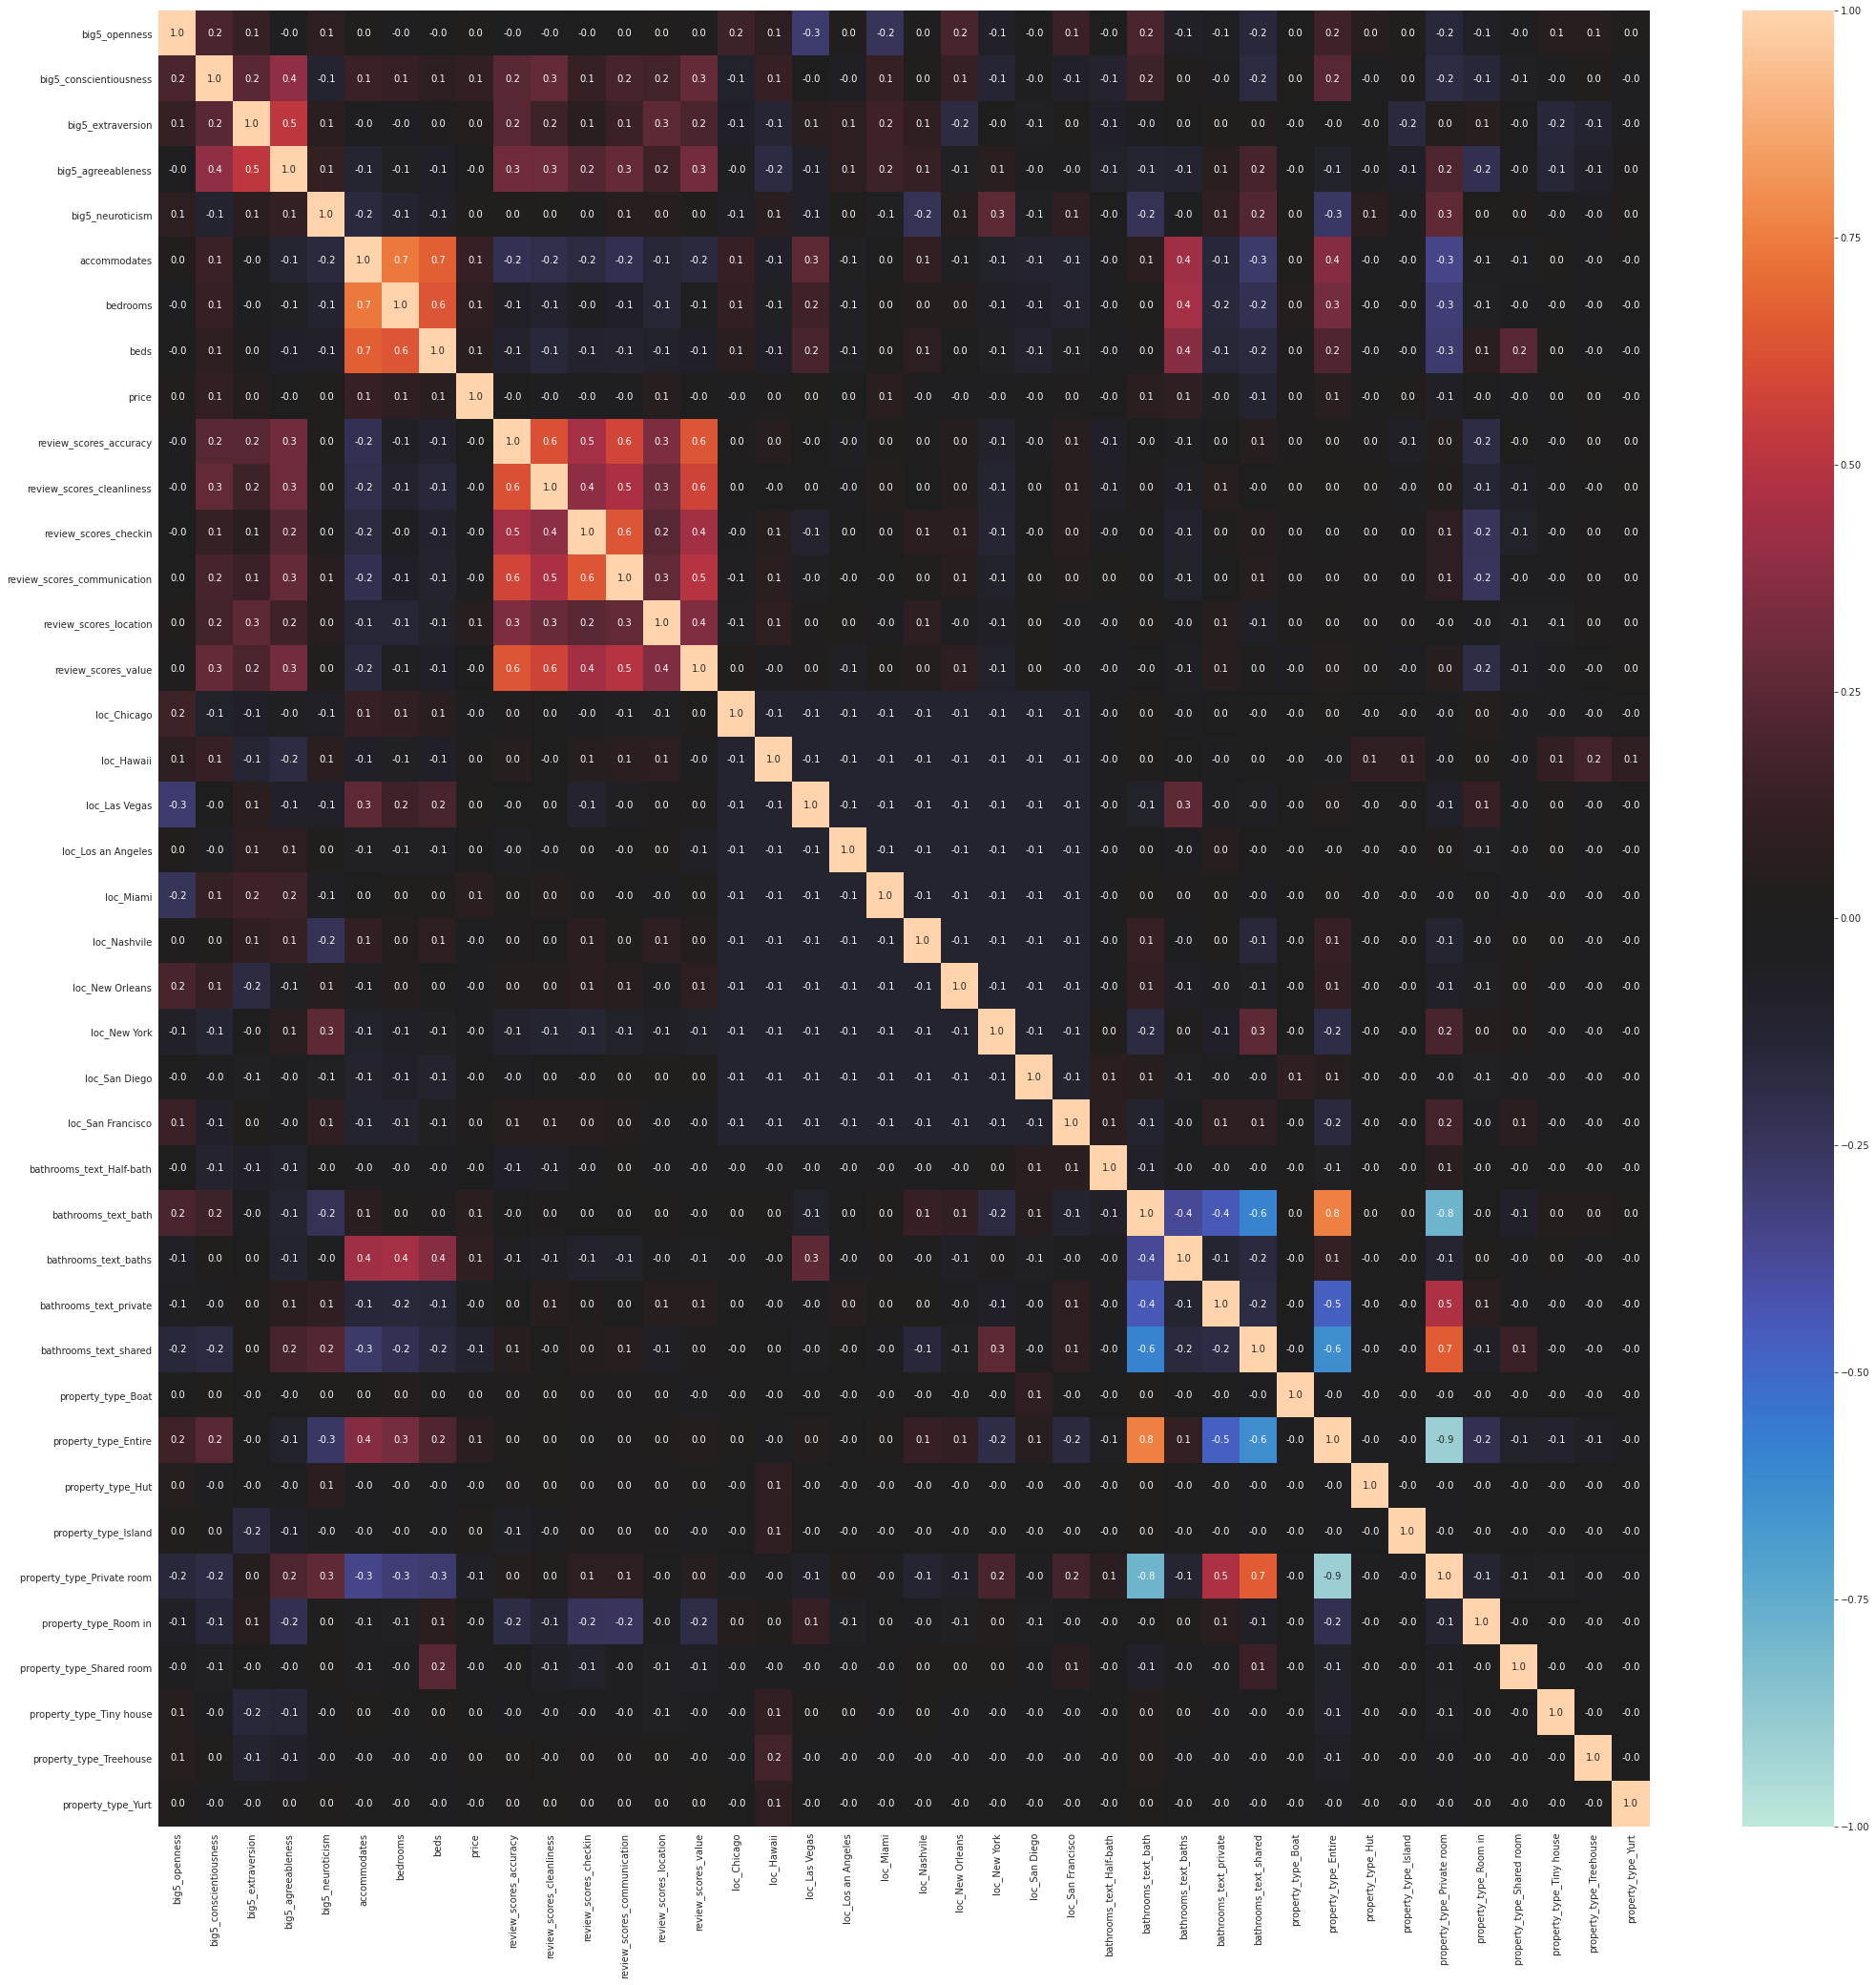

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

plt.figure(figsize=(35,35))
sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

In [43]:
feature_matrix =pd.DataFrame({"big5_openness":corr_mat.iloc[5:,0].values,
                                'big5_conscientiousness':corr_mat.iloc[5:,1].values,
                                'big5_extraversion':corr_mat.iloc[5:,2].values,
                                'big5_agreeableness':corr_mat.iloc[5:,3].values,
                                'big5_neuroticism':corr_mat.iloc[5:,4].values},
                                index = corr_mat.index[5:])

In [44]:
threshold = 0.2

<H1>性格と施設情報における相関 </H1>

In [45]:
# 開放性(好奇心)
feature_matrix.loc[abs(feature_matrix.big5_openness)>threshold]

,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
loc_Las Vegas,-0.287107,-0.007699,0.069750,-0.084228,-0.084822
loc_Miami,-0.238372,0.118325,0.161967,0.151739,-0.051133


In [46]:
# 勤勉性
feature_matrix.loc[abs(feature_matrix.big5_conscientiousness)>threshold]

,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
review_scores_accuracy,-0.021880,0.236323,0.241535,0.309194,0.039007
review_scores_cleanliness,-0.018513,0.272608,0.152054,0.300727,0.026735
review_scores_value,0.012459,0.275179,0.200005,0.318073,0.037806
property_type_Entire,0.156285,0.234551,-0.007447,-0.091964,-0.260931


In [47]:
# 外向性
feature_matrix.loc[abs(feature_matrix.big5_extraversion)>threshold]

,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
review_scores_accuracy,-0.021880,0.236323,0.241535,0.309194,0.039007
review_scores_location,0.037828,0.172307,0.256608,0.159409,0.047438
review_scores_value,0.012459,0.275179,0.200005,0.318073,0.037806


In [48]:
# 協調性　
feature_matrix.loc[abs(feature_matrix.big5_agreeableness)>threshold]

,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
review_scores_accuracy,-0.021880,0.236323,0.241535,0.309194,0.039007
review_scores_cleanliness,-0.018513,0.272608,0.152054,0.300727,0.026735
review_scores_checkin,-0.000950,0.117623,0.067454,0.219182,0.013116
review_scores_communication,0.001911,0.180925,0.146132,0.277798,0.052237
review_scores_value,0.012459,0.275179,0.200005,0.318073,0.037806
property_type_Private room,-0.155121,-0.180692,0.041642,0.210193,0.260401
property_type_Room in,-0.069110,-0.141868,0.053755,-0.212319,0.017386


<p>Private room : 部屋のみ自分用。他の部分は共用。</p>
<p>Entire home/apt : 家全て。</p>

In [49]:
# 情動性
feature_matrix.loc[abs(feature_matrix.big5_neuroticism)>threshold]

,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
loc_Nashvile,0.015321,0.022985,0.098427,0.121044,-0.230005
loc_New York,-0.079795,-0.131832,-0.005587,0.066855,0.257543
bathrooms_text_bath,0.199579,0.153698,-0.044517,-0.118102,-0.231201
bathrooms_text_shared,-0.153138,-0.169000,0.035982,0.187074,0.220699
property_type_Entire,0.156285,0.234551,-0.007447,-0.091964,-0.260931
property_type_Private room,-0.155121,-0.180692,0.041642,0.210193,0.260401


# クラスタ分類

In [50]:
std_review_big5_data = review_big5_data.iloc[:,1:].apply(lambda x : ((x - x.mean())*1/x.std()+0),axis=0)
std_review_big5_data["id"] = review_big5_data["id"].values
std_review_big5_data = pd.DataFrame({"id":review_big5_data["id"].values,
                                        "big5_openness":std_review_big5_data["big5_openness"].values,
                                        "big5_conscientiousness":std_review_big5_data["big5_conscientiousness"].values,
                                        "big5_extraversion":std_review_big5_data["big5_extraversion"].values,
                                        "big5_agreeableness":std_review_big5_data["big5_agreeableness"].values,
                                        "big5_neuroticism":std_review_big5_data["big5_neuroticism"].values,
                                        })
std_review_big5_data.head()

,id,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
0,3831,0.837840,-0.155672,0.834155,0.589481,0.715059
1,4505,0.562193,-1.364726,-0.110912,-0.015324,-0.254172
2,5178,0.342170,1.345882,1.008423,1.356565,-0.369049
3,6422,-0.464583,-2.168962,-1.992433,-2.408746,2.119152
4,7126,0.408907,0.854860,0.722536,0.851225,-0.266169


In [51]:
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from matplotlib import cm

cluster_num = 8
n_init = 200
max_iter = 300
tol = 1e-05
random_state = 78
k_means = KMeans(n_clusters=cluster_num,
                    init='k-means++',
                    n_init=n_init,
                    max_iter=max_iter,
                    tol=tol,
                    random_state=random_state)
pred = k_means.fit_predict(std_review_big5_data.iloc[:,1:].values)

In [52]:
print(pd.DataFrame(pred).value_counts())

5    225
0    190
7    186
3    107
1    105
2     88
4     66
6     33
dtype: int64


In [53]:
clusters_review_big5_data = pd.DataFrame({"id":review_big5_data["id"].values,
                                        "cluster":pred,
                                        "big5_openness":std_review_big5_data["big5_openness"].values,
                                        "big5_conscientiousness":std_review_big5_data["big5_conscientiousness"].values,
                                        "big5_extraversion":std_review_big5_data["big5_extraversion"].values,
                                        "big5_agreeableness":std_review_big5_data["big5_agreeableness"].values,
                                        "big5_neuroticism":std_review_big5_data["big5_neuroticism"].values,
                                        })

In [54]:
clusters_review_big5_data.cluster.value_counts()

5    225
0    190
7    186
3    107
1    105
2     88
4     66
6     33
Name: cluster, dtype: int64

In [55]:
clusters_review_big5_data.head()

,id,cluster,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism
0,3831,0,0.837840,-0.155672,0.834155,0.589481,0.715059
1,4505,0,0.562193,-1.364726,-0.110912,-0.015324,-0.254172
2,5178,5,0.342170,1.345882,1.008423,1.356565,-0.369049
3,6422,3,-0.464583,-2.168962,-1.992433,-2.408746,2.119152
4,7126,5,0.408907,0.854860,0.722536,0.851225,-0.266169


In [56]:
listing_dummies.head()

,id,accommodates,bedrooms,beds,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,loc_Chicago,loc_Hawaii,loc_Las Vegas,loc_Los an Angeles,loc_Miami,loc_Nashvile,loc_New Orleans,loc_New York,loc_San Diego,loc_San Francisco,bathrooms_text_Half-bath,bathrooms_text_bath,bathrooms_text_baths,bathrooms_text_private,bathrooms_text_shared,property_type_Boat,property_type_Entire,property_type_Hut,property_type_Island,property_type_Private room,property_type_Room in,property_type_Shared room,property_type_Tiny house,property_type_Treehouse,property_type_Yurt
0,10069247,3,1.0,2.0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,464581,4,1.0,2.0,67.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,726376,2,1.0,1.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,2570620,2,NaN,2.0,45.0,10.0,10.0,10.0,10.0,9.0,10.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1171860,2,1.0,1.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [57]:
# 分析データの作成
cluster_analyze_data = pd.merge(clusters_review_big5_data,listing_dummies)
print(cluster_analyze_data.shape)
cluster_analyze_data.head()

(1000, 42)


,id,cluster,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism,accommodates,bedrooms,beds,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,loc_Chicago,loc_Hawaii,loc_Las Vegas,loc_Los an Angeles,loc_Miami,loc_Nashvile,loc_New Orleans,loc_New York,loc_San Diego,loc_San Francisco,bathrooms_text_Half-bath,bathrooms_text_bath,bathrooms_text_baths,bathrooms_text_private,bathrooms_text_shared,property_type_Boat,property_type_Entire,property_type_Hut,property_type_Island,property_type_Private room,property_type_Room in,property_type_Shared room,property_type_Tiny house,property_type_Treehouse,property_type_Yurt
0,3831,0,0.837840,-0.155672,0.834155,0.589481,0.715059,3,1.0,3.0,76.0,8.0,9.0,9.0,9.0,9.0,9.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4505,0,0.562193,-1.364726,-0.110912,-0.015324,-0.254172,7,3.0,5.0,105.0,10.0,9.0,10.0,10.0,10.0,9.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5178,5,0.342170,1.345882,1.008423,1.356565,-0.369049,2,1.0,1.0,73.0,9.0,7.0,9.0,9.0,10.0,9.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,6422,3,-0.464583,-2.168962,-1.992433,-2.408746,2.119152,2,2.0,3.0,40.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,7126,5,0.408907,0.854860,0.722536,0.851225,-0.266169,2,3.0,4.0,60.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [58]:
cluster_analyze_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1000 non-null   int64  
 1   cluster                      1000 non-null   int32  
 2   big5_openness                1000 non-null   float64
 3   big5_conscientiousness       1000 non-null   float64
 4   big5_extraversion            1000 non-null   float64
 5   big5_agreeableness           1000 non-null   float64
 6   big5_neuroticism             1000 non-null   float64
 7   accommodates                 1000 non-null   int64  
 8   bedrooms                     863 non-null    float64
 9   beds                         1000 non-null   float64
 10  price                        1000 non-null   float64
 11  review_scores_accuracy       971 non-null    float64
 12  review_scores_cleanliness    971 non-null    float64
 13  review_scores_check

In [59]:
cluster_analyze_data = cluster_analyze_data.fillna(cluster_analyze_data.mean())

In [60]:
cluster_analyze_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1000 non-null   int64  
 1   cluster                      1000 non-null   int32  
 2   big5_openness                1000 non-null   float64
 3   big5_conscientiousness       1000 non-null   float64
 4   big5_extraversion            1000 non-null   float64
 5   big5_agreeableness           1000 non-null   float64
 6   big5_neuroticism             1000 non-null   float64
 7   accommodates                 1000 non-null   int64  
 8   bedrooms                     1000 non-null   float64
 9   beds                         1000 non-null   float64
 10  price                        1000 non-null   float64
 11  review_scores_accuracy       1000 non-null   float64
 12  review_scores_cleanliness    1000 non-null   float64
 13  review_scores_check

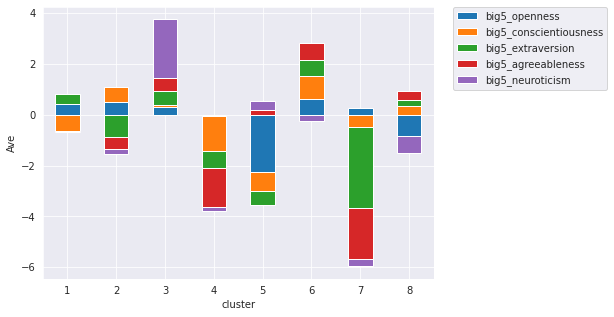

In [61]:
bar_plot = cluster_analyze_data.iloc[:,1:7].groupby('cluster').mean().plot(kind='bar', stacked=True, figsize = (7,5)).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=10)
plt.ylabel("Ave")
plt.xticks(range(cluster_num), [str(x+1) for x in range(cluster_num)], rotation= 0)
plt.show()

In [62]:
cluster_feats = []
for i in range(cluster_num):
    cluster_feats.append(list(abs(cluster_analyze_data.iloc[:,1:7].groupby('cluster').mean().iloc[i,:]).sort_values(ascending=False)[:3].index))
pd.DataFrame(cluster_feats,columns=["1st","2nd","3rd"], index=["cluster"+str(x+1) for x in range(cluster_num)]).replace("big5_openness","開放性").replace("big5_conscientiousness","勤勉性").replace("big5_extraversion","外向性").replace("big5_agreeableness","協調性").replace("big5_neuroticism","情動性")

,1st,2nd,3rd
cluster1,勤勉性,開放性,外向性
cluster2,外向性,勤勉性,開放性
cluster3,情動性,外向性,協調性
cluster4,協調性,勤勉性,外向性
cluster5,開放性,勤勉性,外向性
cluster6,勤勉性,協調性,開放性
cluster7,外向性,協調性,勤勉性
cluster8,開放性,情動性,勤勉性


In [63]:
cluster_analyzes = cluster_analyze_data.groupby("cluster").mean()

In [64]:
cluster_analyzes

,id,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism,accommodates,bedrooms,beds,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,loc_Chicago,loc_Hawaii,loc_Las Vegas,loc_Los an Angeles,loc_Miami,loc_Nashvile,loc_New Orleans,loc_New York,loc_San Diego,loc_San Francisco,bathrooms_text_Half-bath,bathrooms_text_bath,bathrooms_text_baths,bathrooms_text_private,bathrooms_text_shared,property_type_Boat,property_type_Entire,property_type_Hut,property_type_Island,property_type_Private room,property_type_Room in,property_type_Shared room,property_type_Tiny house,property_type_Treehouse,property_type_Yurt
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7.421458e+06,0.409000,-0.642237,0.407835,0.018358,-0.052230,2.857895,1.187449,1.578947,99.834579,9.856193,9.607144,9.930863,9.920218,9.882910,9.612472,0.184211,0.052632,0.047368,0.163158,0.042105,0.105263,0.068421,0.110526,0.115789,0.110526,0.000000,0.610526,0.042105,0.115789,0.231579,0.000000,0.589474,0.000000,0.000000,0.347368,0.042105,0.015789,0.000000,0.000000,0.005263
1,5.052573e+06,0.519267,0.572663,-0.889199,-0.447097,-0.189207,3.161905,1.282382,1.590476,111.572095,9.831936,9.730616,9.949792,9.968408,9.871483,9.654661,0.047619,0.247619,0.028571,0.066667,0.019048,0.028571,0.323810,0.066667,0.104762,0.066667,0.000000,0.780952,0.076190,0.076190,0.066667,0.009524,0.809524,0.000000,0.000000,0.142857,0.019048,0.000000,0.009524,0.009524,0.000000
2,7.454550e+06,0.316894,0.063140,0.554258,0.510703,2.315235,2.579545,1.150321,1.409091,112.461023,9.859962,9.685879,9.953001,9.952743,9.917646,9.754201,0.056818,0.113636,0.079545,0.079545,0.113636,0.000000,0.090909,0.215909,0.068182,0.181818,0.000000,0.306818,0.113636,0.193182,0.386364,0.000000,0.340909,0.011364,0.000000,0.636364,0.011364,0.000000,0.000000,0.000000,0.000000
3,7.301487e+06,-0.030509,-1.391976,-0.670864,-1.527321,-0.165134,3.093458,1.265787,1.785047,92.106822,9.588785,9.373832,9.850467,9.775701,9.803738,9.411215,0.112150,0.093458,0.149533,0.065421,0.018692,0.102804,0.056075,0.102804,0.102804,0.196262,0.037383,0.542056,0.177570,0.102804,0.140187,0.000000,0.588785,0.000000,0.000000,0.317757,0.074766,0.009346,0.009346,0.000000,0.000000
4,1.480737e+07,-2.249902,-0.740543,-0.579029,0.175709,0.387924,2.136364,1.048913,1.181818,68.151515,9.893939,9.742424,9.924242,9.939394,9.863636,9.712121,0.045455,0.121212,0.166667,0.090909,0.181818,0.000000,0.000000,0.272727,0.075758,0.045455,0.000000,0.227273,0.015152,0.181818,0.575758,0.000000,0.196970,0.000000,0.000000,0.742424,0.045455,0.015152,0.000000,0.000000,0.000000
5,6.270941e+06,0.623643,0.911900,0.604649,0.693924,-0.232099,3.080000,1.221759,1.626667,106.937156,9.952095,9.828736,9.965566,9.969456,9.949514,9.873482,0.124444,0.088889,0.048889,0.102222,0.075556,0.155556,0.120000,0.075556,0.075556,0.133333,0.004444,0.644444,0.053333,0.133333,0.164444,0.000000,0.675556,0.000000,0.000000,0.315556,0.008889,0.000000,0.000000,0.000000,0.000000
6,6.847367e+06,0.252233,-0.460805,-3.203376,-2.028086,-0.280162,3.818182,1.264756,1.727273,85.000000,9.393939,9.272727,9.757576,9.666667,9.454545,9.212121,0.212121,0.272727,0.060606,0.030303,0.000000,0.000000,0.212121,0.000000,0.181818,0.030303,0.000000,0.666667,0.030303,0.181818,0.121212,0.000000,0.484848,0.000000,0.030303,0.303030,0.030303,0.000000,0.090909,0.060606,0.000000
7,9.857629e+06,-0.844115,0.345083,0.251432,0.328686,-0.647400,3.655914,1.413231,1.946237,126.467742,9.878404,9.762295,9.953335,9.941973,9.885829,9.746498,0.026882,0.037634,0.220430,0.096774,0.263441,0.166667,0.026882,0.037634,0.118280,0.005376,0.000000,0.634409,0.166667,0.091398,0.107527,0.000000,0.758065,0.000000,0.000000,0.220430,0.016129,0.000000,0.005376,0.000000,0.000000


# 決定木分析


In [65]:
!pip install dtreeviz

     |████████████████████████████████| 61kB 3.6MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.2-cp37-none-any.whl size=60009 sha256=b04dac1dcdaefe08351d055be455fcf8f7839a8d2fe461f55851dae40f47afe8
  Stored in directory: /root/.cache/pip/wheels/b9/4b/20/0bde3e04ace9178327ffabf575f9bbc4abb1d0c4f8c355306a
Successfully built dtreeviz


In [66]:
cluster_analyze_data.head()

,id,cluster,big5_openness,big5_conscientiousness,big5_extraversion,big5_agreeableness,big5_neuroticism,accommodates,bedrooms,beds,price,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,loc_Chicago,loc_Hawaii,loc_Las Vegas,loc_Los an Angeles,loc_Miami,loc_Nashvile,loc_New Orleans,loc_New York,loc_San Diego,loc_San Francisco,bathrooms_text_Half-bath,bathrooms_text_bath,bathrooms_text_baths,bathrooms_text_private,bathrooms_text_shared,property_type_Boat,property_type_Entire,property_type_Hut,property_type_Island,property_type_Private room,property_type_Room in,property_type_Shared room,property_type_Tiny house,property_type_Treehouse,property_type_Yurt
0,3831,0,0.837840,-0.155672,0.834155,0.589481,0.715059,3,1.0,3.0,76.0,8.0,9.0,9.0,9.0,9.0,9.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,4505,0,0.562193,-1.364726,-0.110912,-0.015324,-0.254172,7,3.0,5.0,105.0,10.0,9.0,10.0,10.0,10.0,9.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5178,5,0.342170,1.345882,1.008423,1.356565,-0.369049,2,1.0,1.0,73.0,9.0,7.0,9.0,9.0,10.0,9.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,6422,3,-0.464583,-2.168962,-1.992433,-2.408746,2.119152,2,2.0,3.0,40.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,7126,5,0.408907,0.854860,0.722536,0.851225,-0.266169,2,3.0,4.0,60.0,10.0,9.0,10.0,10.0,10.0,10.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


In [67]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

train_data = std.fit_transform(cluster_analyze_data.iloc[:,7:])
pred_data = cluster_analyze_data.iloc[:,1]

In [68]:
from tqdm import tqdm
import scipy.stats

import matplotlib.pyplot as plt 

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import f1_score

test_size = 0.2136
train_X, test_X, train_y, test_y = train_test_split(train_data, pred_data, test_size = test_size,random_state=0)

best_param =  {'criterion': 'gini', 'max_depth': 14, 'min_samples_leaf': 6, 'min_samples_split': 15, 'random_state': 100, 'splitter': 'random'}
dtree = DecisionTreeClassifier(**best_param)
#dtree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
#                       max_depth=6, max_features=None, max_leaf_nodes=None,
#                       min_impurity_decrease=0.0, min_impurity_split=None,
#                       min_samples_leaf=5, min_samples_split=11,
#                       min_weight_fraction_leaf=0.0, presort='deprecated',
#                       random_state=60, splitter='random')
dtree.fit(train_data, pred_data)
pred_y = dtree.predict(test_X)

score = f1_score(test_y, pred_y, average="micro")
print("score:",score)

score: 0.514018691588785


In [69]:
len(cluster_analyze_data.iloc[:,7:].columns)

35

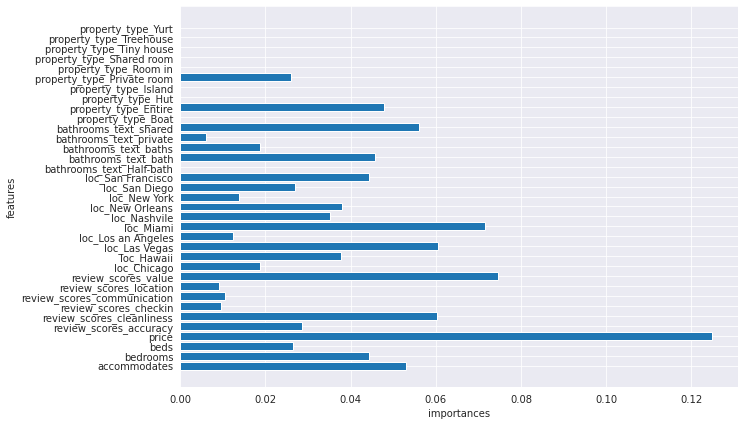

In [70]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances(model):
    n_features = len(cluster_analyze_data.iloc[:,7:].columns)
    plt.figure(figsize=(10,7))
    plt.barh(range(n_features), model.feature_importances_, align='center') # 描画する際の枠組みを設定
    plt.yticks(np.arange(n_features), cluster_analyze_data.iloc[:,7:].columns) # 縦軸の設定
    plt.xlabel('importances') # 横軸の設定
    plt.ylabel('features') # 縦軸の設定
    plt.show()

# 実行
plot_feature_importances(dtree)

In [71]:
pd.DataFrame({"feature_name":cluster_analyze_data.iloc[:,7:].columns, "feature_impotances":dtree.feature_importances_}).sort_values("feature_impotances",ascending = False)["feature_name"][:5].values

array(['price', 'review_scores_value', 'loc_Miami', 'loc_Las Vegas',
       'review_scores_cleanliness'], dtype=object)

In [72]:
clusters = []
for i in range(len(pred_data.unique())):
    clusters.append("cluster"+str(i+1))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


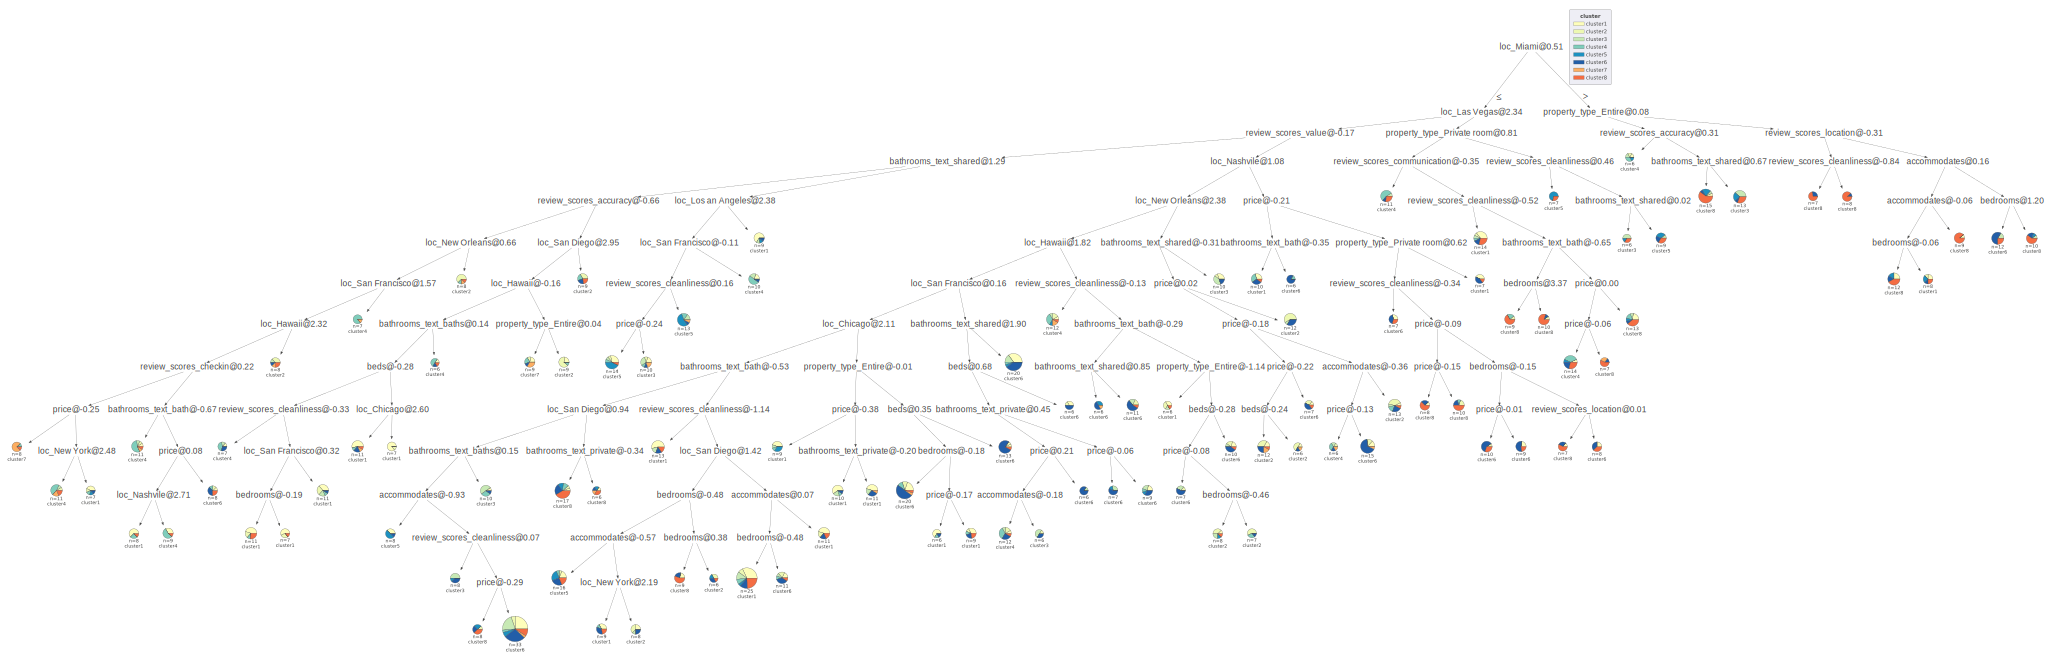

In [73]:
from dtreeviz.trees import *
import graphviz

viz = dtreeviz(dtree,train_data,pred_data,
               target_name="cluster",
               feature_names=cluster_analyze_data.iloc[:,7:].columns,
               class_names=clusters,
               fancy=False
               )
 
viz.save('/content/drive/My Drive/graph_data/cluster_tree_no_hist.svg')
viz

In [74]:
from dtreeviz.trees import *
import graphviz

viz = dtreeviz(dtree,train_data,pred_data,
               target_name="cluster",
               feature_names=cluster_analyze_data.iloc[:,7:].columns,
               class_names=clusters,
               )
 
viz.save('/content/drive/My Drive/graph_data/cluster_tree.svg')
viz

Output hidden; open in https://colab.research.google.com to view.